# PARTIE 1 : DÉCORATEUR

In [11]:
#EXEMPLE

def mon_decorateur(fonction):
    def inner(*param, **param2):
        print("Code avant appel de la fonction")
        fonction(*param, **param2)
        print("Code après appel de la fonction")
    return inner

@mon_decorateur
def Affichage(v):
    print("Affichage",v)

l = [1,2,3,4]
Affichage(l)

Code avant appel de la fonction
Affichage [1, 2, 3, 4]
Code après appel de la fonction


In [13]:
from time import time

def timer(fonction):
    def inner(*param, **param2):
        debut = time()
        fonction(*param, **param2)
        fin = time()
        print("Temps d'execution : ", fin - debut)
    return inner

Affichage(l)

Code avant appel de la fonction
Affichage [1, 2, 3, 4]
Code après appel de la fonction


# PARTIE 2 : CALCUL SCIENTIFIQUE : MASSE-RESSORT

## PARTIE 2.1 : MASSE-RESSORT CLASSIQUE

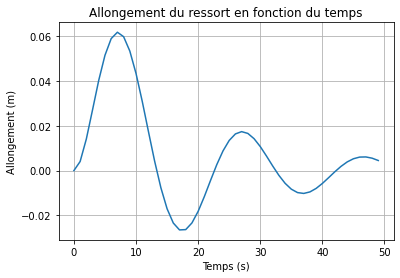

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p0 = np.array([0.,0.,0.]) #Position initiale extremité fixe
p1 = np.array([0.,-1.,0.]) #Position initiale extremité libre
m = 1.0 #Masse
k = 0.1 #Raideur
amort = 0.1 #Amortissement
deltat = 1.0 #Pas d'intégration
time_sim = 50 #Temps de simulation

# Initialisation des variables
position_B = p1  # Position initiale de B
vitesse_B = np.array([0., 0., 0.1])  # Vitesse initiale
allongements = []  # Liste pour stocker les allongements
temps = np.arange(0, time_sim, deltat)

# Simulation
for t in temps:
    # Calcul du vecteur BA et de la norme de BA
    BA = position_B - p0
    norme_BA = np.linalg.norm(BA)
    
    # Calcul de l'allongement du ressort
    delta_L = norme_BA - 1  # Allongement par rapport à la longueur initiale du ressort

    # Calcul des forces
    force_ressort = -k * delta_L * BA / norme_BA  # Force du ressort
    force_amort = -amort * vitesse_B  # Force d'amortissement
    force_total = force_ressort + force_amort  # Force totale agissant sur la masse
    
    # Accélération
    acceleration = force_total / m
    
    # Mise à jour de la vitesse et de la position avec la méthode d'Euler
    vitesse_B += acceleration * deltat
    position_B += vitesse_B * deltat
    
    # Enregistrement de l'allongement
    allongements.append(delta_L)

# Affichage des résultats
plt.plot(temps, allongements)
plt.title('Allongement du ressort en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Allongement (m)')
plt.grid(True)
plt.show()

## PARTIE 2.2 - MATPLOTLIB.WIDGETS

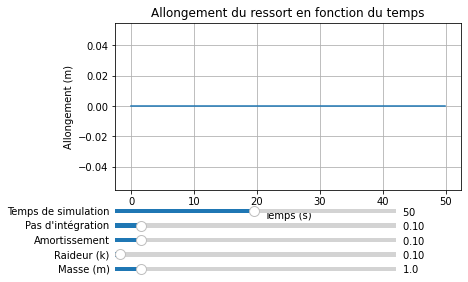

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Fonction pour la simulation du système ressort-amortisseur
def simulate_system(m, k, amort, deltat, time_sim):
    # Initialisation des positions et des paramètres
    p0 = np.array([0., 0., 0.])  # Position fixe A
    p1 = np.array([0., -1., 0.])  # Position initiale de B
    vitesse_B = np.array([0., 0., 0.])  # Vitesse initiale
    allongements = []  # Liste pour stocker les allongements
    temps = np.arange(0, time_sim, deltat)

    # Simulation
    for t in temps:
        BA = p1 - p0
        norme_BA = np.linalg.norm(BA)
        delta_L = norme_BA - 1  # Allongement par rapport à la longueur initiale du ressort
        force_spring = -k * delta_L * BA / norme_BA
        force_damping = -amort * vitesse_B
        force_total = force_spring + force_damping
        
        acceleration = force_total / m
        vitesse_B += acceleration * deltat
        p1 += vitesse_B * deltat
        allongements.append(delta_L)

    return temps, allongements

# Fonction pour mettre à jour le graphique en fonction des sliders
def update(val):
    # Récupération des valeurs des sliders
    m = slider_m.val
    k = slider_k.val
    amort = slider_amort.val
    deltat = slider_deltat.val
    time_sim = slider_time_sim.val

    # Simulation du système avec les nouveaux paramètres
    temps, allongements = simulate_system(m, k, amort, deltat, time_sim)

    # Mise à jour du graphique
    line.set_xdata(temps)
    line.set_ydata(allongements)
    ax.relim()
    ax.autoscale_view()
    plt.draw()

# Création de la figure et des axes
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.3)

# Valeurs initiales pour les sliders
initial_values = [1.0, 0.1, 0.1, 0.1, 50]

# Tracer une ligne vide au début
temps, allongements = simulate_system(*initial_values)
line, = ax.plot(temps, allongements, label="Allongement du ressort")
ax.set_title('Allongement du ressort en fonction du temps')
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Allongement (m)')
ax.grid(True)

# Création des sliders
ax_m = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_k = plt.axes([0.1, 0.06, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_amort = plt.axes([0.1, 0.11, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_deltat = plt.axes([0.1, 0.16, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_time_sim = plt.axes([0.1, 0.21, 0.65, 0.03], facecolor='lightgoldenrodyellow')

# Sliders pour les paramètres
slider_m = Slider(ax_m, 'Masse (m)', 0.1, 10.0, valinit=initial_values[0])
slider_k = Slider(ax_k, 'Raideur (k)', 0.01, 5.0, valinit=initial_values[1])
slider_amort = Slider(ax_amort, 'Amortissement', 0.01, 1.0, valinit=initial_values[2])
slider_deltat = Slider(ax_deltat, 'Pas d\'intégration', 0.01, 1.0, valinit=initial_values[3])
slider_time_sim = Slider(ax_time_sim, 'Temps de simulation', 1, 100, valinit=initial_values[4])

# Connecter les sliders à la fonction de mise à jour
slider_m.on_changed(update)
slider_k.on_changed(update)
slider_amort.on_changed(update)
slider_deltat.on_changed(update)
slider_time_sim.on_changed(update)

# Affichage du graphique
plt.show()